#  Visualization Course project

In [1]:
###########################################################################################################################
# Group: Jyothi Nandikonda, Syed Sumera, Jhansi, Farhan Emmanuel Raj                                                                 #
#                                                                                                                         #
# Coursename: Visual Analytics                                                                                            #
#                                                                                                                         #
# Deadline: 27.01.2019                                                                                                    #
#                                                                                                                         #
###########################################################################################################################

In [2]:
###########################################################################################################################
#                                                                                                                         #
#  The Course Project will be                                                                                             #
#  @ Choosing the Dataset and Analyze it : BlackFriday.csv                                                                #
#  @ Choosing an Appropriate Visualization Tool : We have choosen Python Library (Seaborn and Matplotlib)                 #
#  @ create visualizations of the dataset/features/output                                                                 #
#  @ create a Report that draws on the visualizations and explains details in text form that you found and the insights   #
#    you have gained.                                                                                                     #
#                                                                                                                         #
######################################################################################### Maa##################################

In [3]:
##########################################################################################################################
# 
# During the BlackbFriday sale we have drawn some conclusions
#
# Who Made the Most purchases??:  Men or Women. We have Observed that Men has done Most Purchases than Woman
#
# People who are in 26-35 age groups spent more money (made most purchases) in Black Friday than other age groups
#
# People who are in Low Occupation spent much money than people who are with high occupation
#
# People who are from different city spent more money than who live in the same city
#
# MArried couple Spent or purchased more than Unmarried

In [4]:
#Decsription

#  About this Dataset

The dataset here is a sample of the transactions made in a retail store (BlackFriday.csv). The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought".

In [5]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# First I will import the basic libraries.
# Data Analysis
import numpy as np
import pandas as pd

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

% matplotlib inline

In [7]:
#Importing the data on a csv file.

In [8]:
##reading the data
df = pd.read_csv("/Users/jnandikonda/Downloads/BlackFriday.csv")

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB




# HeatMap

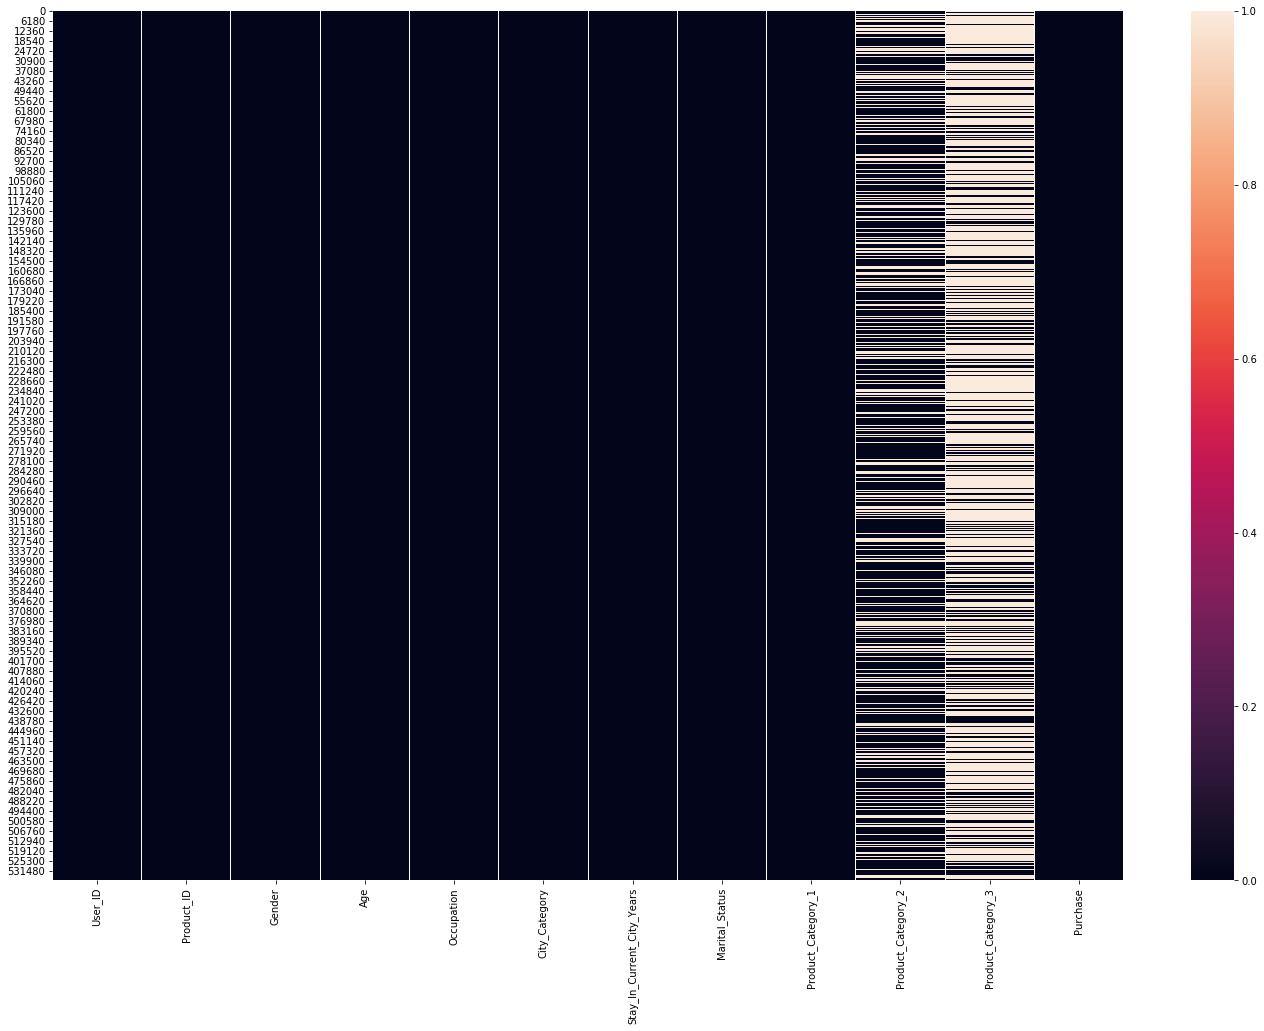

In [11]:
# Let's see if there are missing values.

plt.figure(figsize=(24,16))

sns.heatmap(df.isnull())

# As from the HeatMap, We can see that there are missing values only in "Product_Category_2"and "Product_Category_3""
# Before, to solve missing value problems, We will see if I can do some conclusions from this data.

In [12]:
# Here we are trying to find out Who Made most of the purchases? Based on the GENDER

# Gender
Lets first find whether the data is uniformly distributed by gender by looking at how many entries belong to each one:

In [13]:
# First Conclusion: Men go to Black Friday more than women.


In [14]:
count_m = df[df['Gender']=='M'].count()[0]
count_f = df[df['Gender']=='F'].count()[0]
print('Number of male clients:',count_m)
print('Number of female clients:',count_f)

Number of male clients: 405380
Number of female clients: 132197


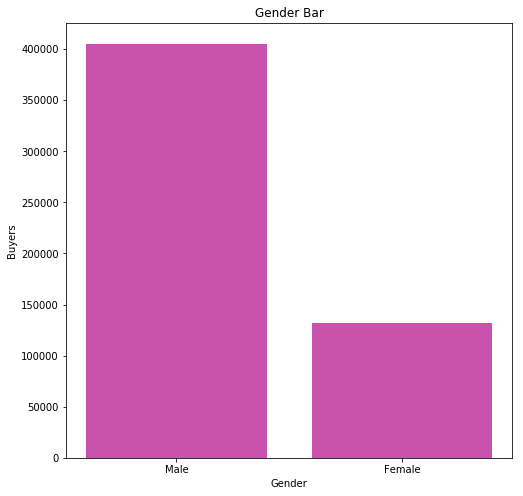

In [15]:
# draw figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.bar( ['Male', 'Female'], [count_m, count_f], color='#c952ad')
plt.title('Gender Bar')
plt.xlabel('Gender')
plt.ylabel('Buyers')
plt.show()

In [16]:
# From this above plot it is clear that Men do more shopping than Women. Let's look at the  Most (purchases) made by gender.

# We can see that the number of Male clients recorded exceeds the number of female clients recorded by almost 4 times. For this reason, it will be much more informational to analyze Gender by using ratios instead of counting each entry. Lets see how much each gender spent in regards to eachself:

In [17]:
# total purchase by gender
male_purch = df[ df['Gender']=='M']['Purchase'].sum()
female_purch = df[ df['Gender']=='F']['Purchase'].sum()
print('Male user: {0}'.format(male_purch))
print('Female user: {0}'.format(female_purch))

Male user: 3853044357
Female user: 1164624021


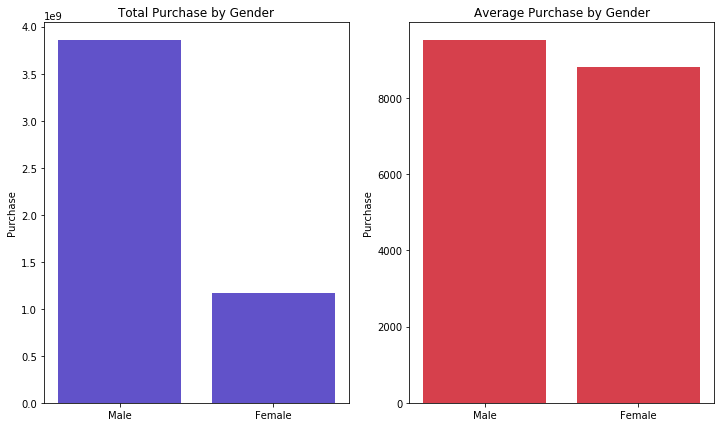

In [18]:
# draw figure
fig = plt.figure(figsize=(12,7))

# Graph total purchase by gender
ax1 = fig.add_subplot(121)
ax1.bar( ['Male', 'Female'], [male_purch, female_purch], color='#6152c9')
plt.title('Total Purchase by Gender')
plt.ylabel('Purchase')

# graph total purchase by gender
ax2 = fig.add_subplot(122)
ax2.bar( ['Male', 'Female'], [male_purch/count_m, female_purch/count_f], color='#d6404c')
plt.title('Average Purchase by Gender')
plt.ylabel('Purchase')

plt.show()

In [19]:
print('Female Purchases:',round(df[df['Gender']=='F']['Purchase'].sum()/count_f,2))
print('Male Purchases:',round(df[df['Gender']=='M']['Purchase'].sum()/count_m,2))

Female Purchases: 8809.76
Male Purchases: 9504.77


In [20]:
# Unique Item Purchase by Gender

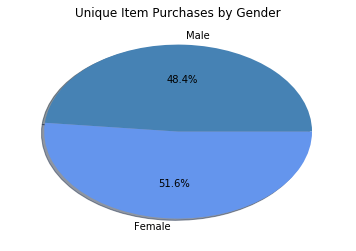

In [21]:
plt.pie(df.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['steelblue','cornflowerblue'])
plt.title('Unique Item Purchases by Gender')
plt.show()

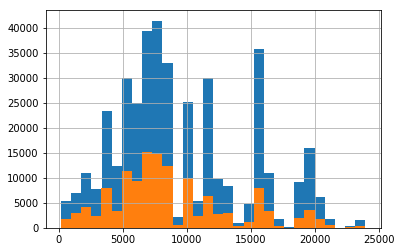

In [22]:
# How much Men and Women spent in Black Friday. Histogram:Graphical representation
# Men ---> blue bar
# Women ---> orange bar

df[df.Gender == 'M']['Purchase'].hist(bins=30)
df[df.Gender == 'F']['Purchase'].hist(bins=30)



#  Find out the Age groups who have participated more in the Black Friday Sale

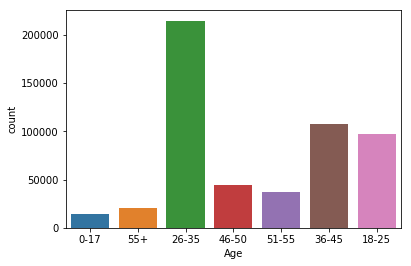

In [23]:
# Second Conclusion: People who has 26-35 participate in Black Friday much more than others. 
# Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. 
# In summary we have three groups with the almost the same quantity of people between each element within the group.
# Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17.

sns.countplot(df.Age)


# Expenditure of People of Different Age and Gender on Black Friday

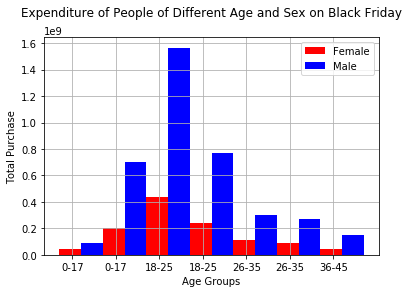

In [24]:
fun={'Purchase':{'Purchase':'sum'}}
groupby=df.groupby(["Age","Gender"]).agg(fun).reset_index()
groupby.columns=groupby.columns.droplevel(1)
groupby.count()
ind =np.arange(0,groupby.count().Gender,2)
width=1.0
fig, ax = plt.subplots()
rects1 = ax.bar(ind, groupby[groupby['Gender']=='F'].Purchase, width, color='r')
rects2 = ax.bar(ind + width, groupby[groupby['Gender']=='M'].Purchase, width, color='b')
ax.set_ylabel('Total Purchase')
ax.set_xlabel('Age Groups')

ax.set_title('Expenditure of People of Different Age and Sex on Black Friday\n')
ax.legend((rects1[0], rects2[0]), ('Female', 'Male'))
ax.set_xticks(ind +0.1)
ax.set_xticklabels(groupby['Age'])
plt.grid(True)
plt.show()


# Line Graph: Age Group

In [25]:
# Line Graph shows the Numbers of Users in each Age Group
# Graph shows at the peaks : Age group 26-35. 

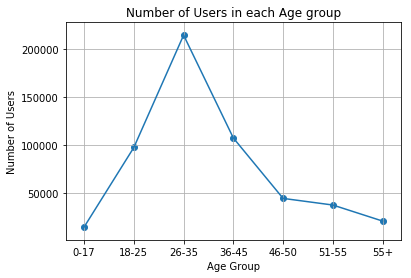

In [26]:
fun={'User_ID':{'Count':'count'}}
Age_Count=df.groupby("Age").agg(fun).reset_index()
Age_Count.columns=Age_Count.columns.droplevel(1)
plt.plot(Age_Count.User_ID)
plt.scatter(Age_Count['Age'],Age_Count['User_ID'])
plt.title("Number of Users in each Age group")
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

C:\Users\jnandikonda\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\jnandikonda\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


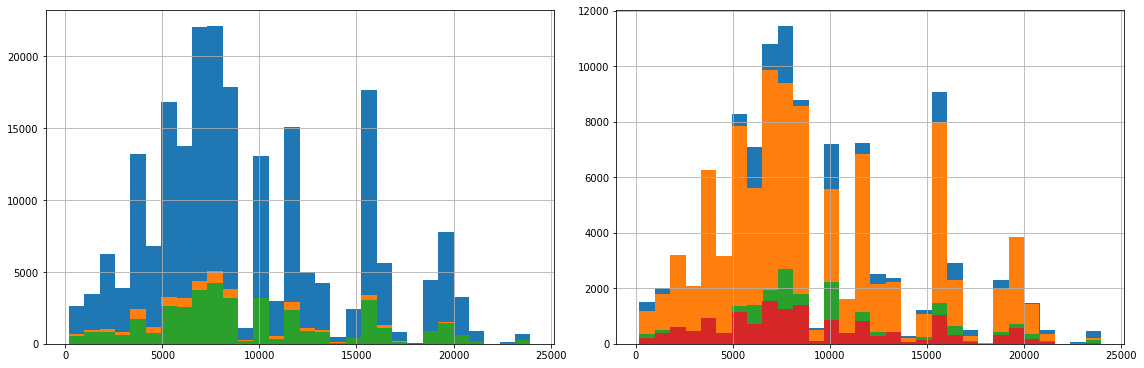

In [27]:
# How much different Ages people spent in Black Friday.
# 26-35 ---> blue bar
# 36-45 ---> orange bar
# 18-25 ---> green bar
#--------------------
# 46-50 ---> blue bar
# 51-55 ---> orange bar
# 55+ ---> green bar
# 0-17 ---> red bar


plt.subplot(2,2,1)
df[df.Age == '26-35']['Purchase'].hist(bins=30, figsize=(16,10))

plt.subplot(2,2,2)
df[df.Age == '36-45']['Purchase'].hist(bins=30)
df[df.Age == '18-25']['Purchase'].hist(bins=30)

plt.subplot(2,2,1)
df[df.Age == '46-50']['Purchase'].hist(bins=30)
df[df.Age == '51-55']['Purchase'].hist(bins=30)

plt.subplot(2,2,2)
df[df.Age == '55+']['Purchase'].hist(bins=30)
df[df.Age == '0-17']['Purchase'].hist(bins=30)

plt.tight_layout()
# apparently the same proportion with the last graph.

# Barchart:Occupation

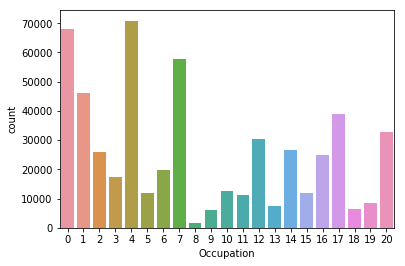

In [28]:
# Third Conclusion: When you look at the Occupation, It is possible to realize that people with
# lows and highs occupation number go out to Black Friday more than who was mediums occupation number.
# Between lows and highs, low occupation number go out more than high occupation number.

sns.countplot(df.Occupation)

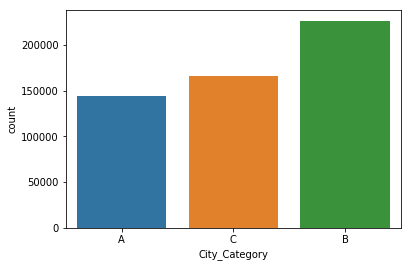

In [29]:
# Fourth Conclusion: People who lives in City B bought much more than others. 
# Followed by City C and A, with the almost the same number of people.

sns.countplot(df.City_Category)

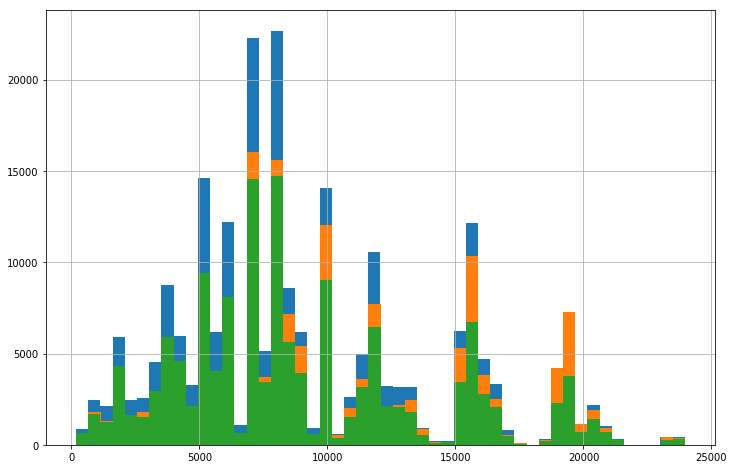

In [30]:
# How much people who lives in different cities spent in Black Friday.
# City B ---> blue bar
# City C ---> orange bar
# City A ---> green bar

plt.figure(figsize=(12,8))
df[df.City_Category == 'B']['Purchase'].hist(bins=50)
df[df.City_Category == 'C']['Purchase'].hist(bins=50)
df[df.City_Category == 'A']['Purchase'].hist(bins=50)

# Fifth Conclusion: We can see that, in less amount of money, people who lives in City A and C spent almost the same.

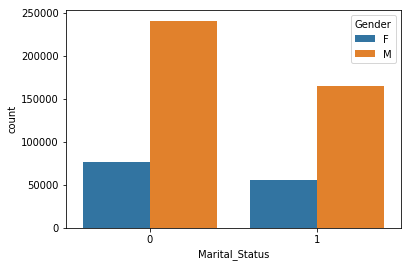

In [31]:
# Sixth Conclusion: People who are married attend the event more than who aren't. 

sns.countplot(df.Marital_Status, hue = df.Gender)
# 0 UnMarried
# 1 Married


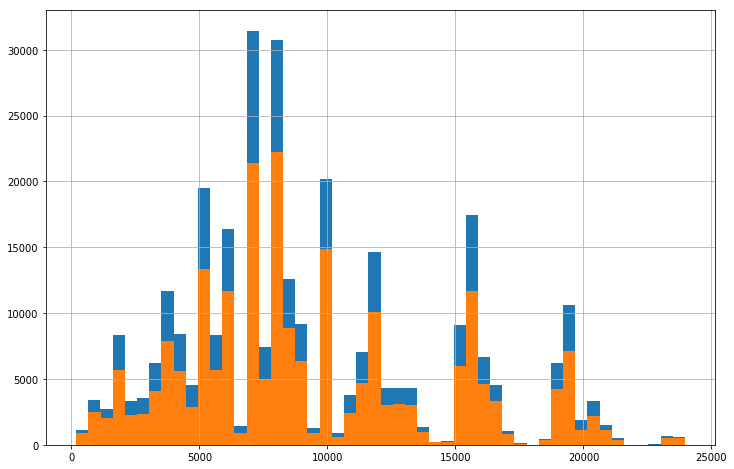

In [32]:
# How much Married and No Married people spent in Black Friday.
# No maried ---> blue bar
# Married ---> orange bar

plt.figure(figsize=(12,8))
df[df.Marital_Status == 0]['Purchase'].hist(bins=50)
df[df.Marital_Status == 1]['Purchase'].hist(bins=50)

# apparently the same proportion with the last graph.

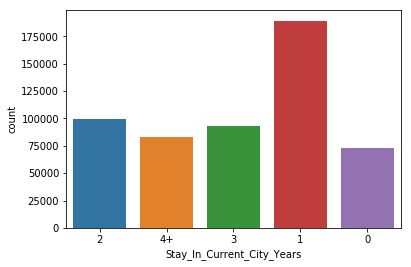

In [33]:
# Seventh Conclusion: People who has less time in the same city go to Black Friday more than has more time.
# The exception is who has less than 1 (one) year.

sns.countplot(df.Stay_In_Current_City_Years)

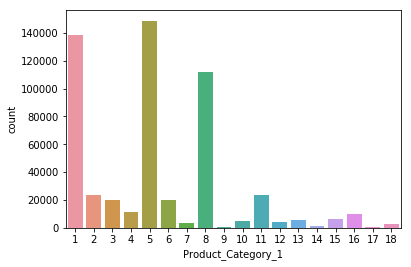

In [34]:
sns.countplot(df.Product_Category_1)

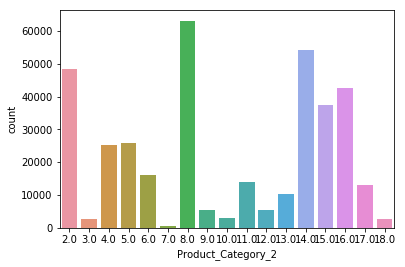

In [35]:
sns.countplot(df.Product_Category_2)

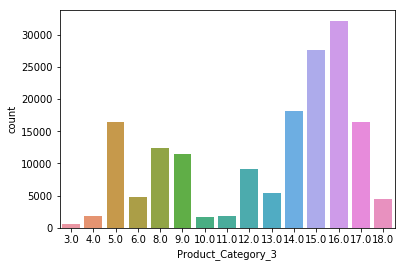

In [36]:
sns.countplot(df.Product_Category_3)

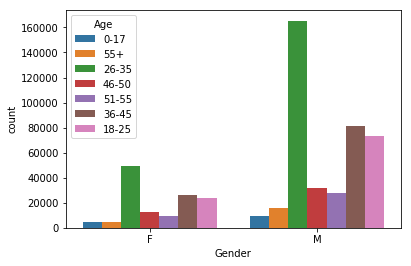

In [37]:
# We can see the same behavior and both male and female people, when we look in Age column.
# Hence, no relevant conclusions.

sns.countplot(data=df, x=df.Gender, hue=df.Age)

In [38]:
# We will see now about the distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B9BFE7320>,
      dtype=object)

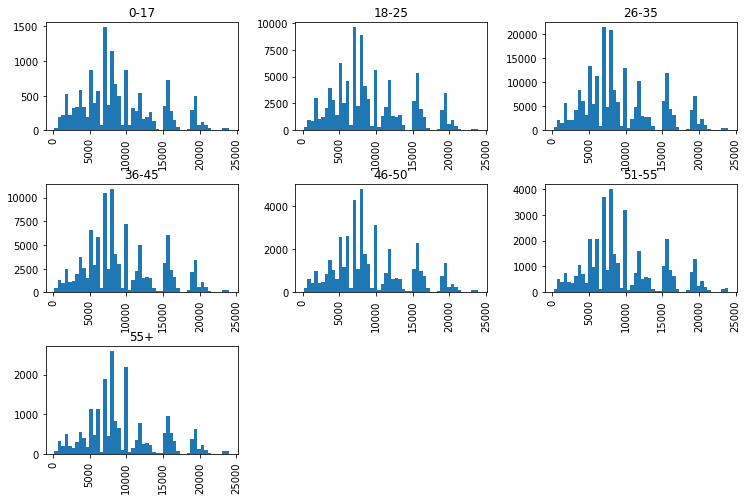

In [39]:
df.Purchase.hist(bins=50, figsize=(12,8), by=df.Age)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BA11A5A58>,
      dtype=object)

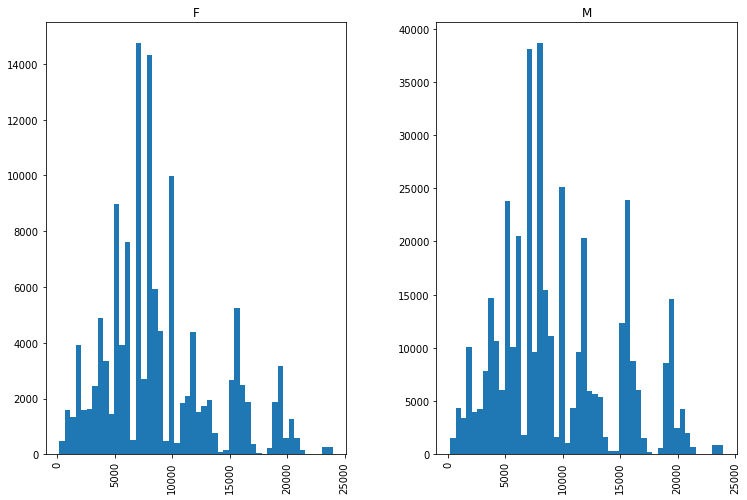

In [40]:
df.Purchase.hist(bins=50, figsize=(12,8), by=df.Gender)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BA0E5EC50>,
      dtype=object)

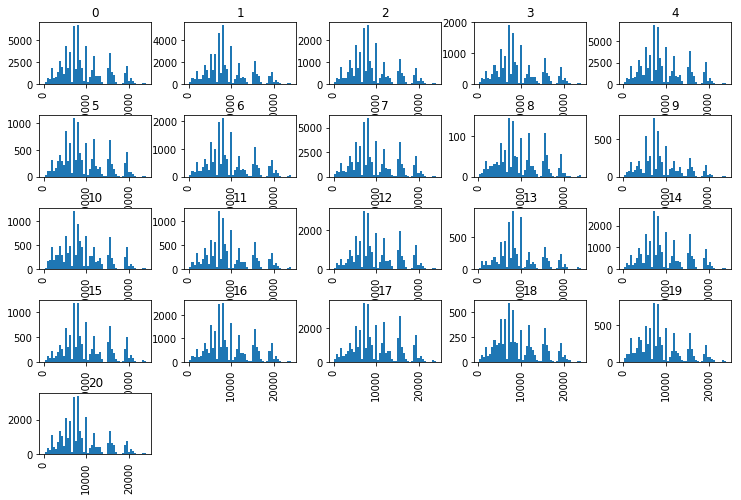

In [41]:
df.Purchase.hist(bins=50, figsize=(12,8), by=df.Occupation)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BA2499828>,
      dtype=object)

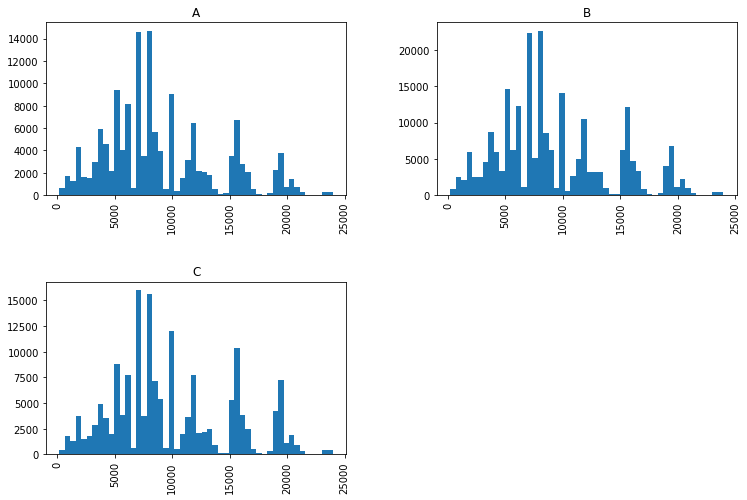

In [42]:
df.Purchase.hist(bins=50, figsize=(12,8), by=df.City_Category)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BA2075978>,
      dtype=object)

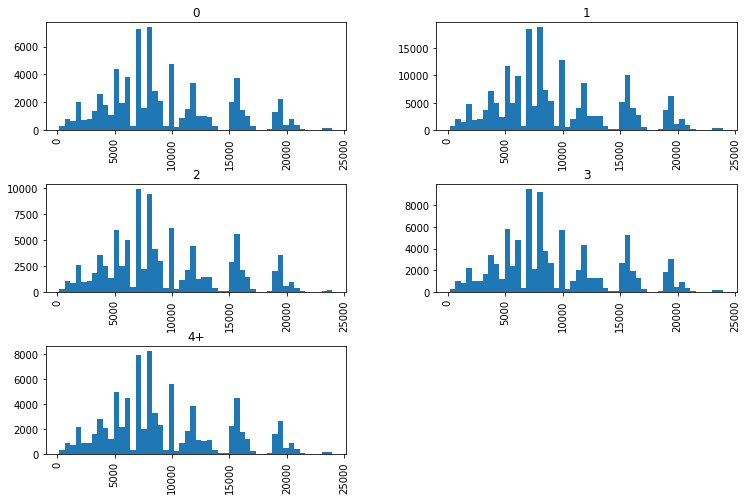

In [43]:
df.Purchase.hist(bins=50, figsize=(12,8), by=df.Stay_In_Current_City_Years)

In [44]:
# Before we make the model ready for train and test split. we should fill null values
# we figuered it out in our first heatmap that, onky product categry 2 and 3 have null values

In [45]:

df.Product_Category_2.isnull().sum()

# Despite having a lot of missing values, I choose to use this column with fill values.

166986

In [46]:
df.Product_Category_3.isnull().sum()

# Despite having a lot of missing values, I choose to use this column with fill values.

373299

In [47]:
# I'm trying to understand the values in this column to figure out how can I solve this.

df.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [48]:
# This column has few numbers, so I can calculate the mean and use it to fill the missing values.
# I won't use the lowest number.
# mean = 15.5

df.Product_Category_3.value_counts().head()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
Name: Product_Category_3, dtype: int64

In [49]:
# Fill the missing values and check!

df.Product_Category_3.fillna(value=15.5, inplace=True)

df.Product_Category_3.head(10)

0    15.5
1    14.0
2    15.5
3    15.5
4    15.5
5    15.5
6    17.0
7    15.5
8    15.5
9    15.5
Name: Product_Category_3, dtype: float64

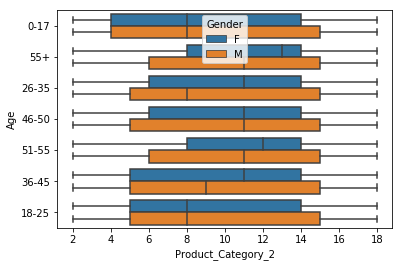

In [50]:
# I will see if I can use the mean in the boxplot graph to figure out what number I will fill.
# I will use Age and Gende.

sns.boxplot(x=df.Product_Category_2, y=df.Age, hue=df.Gender)

# I think that this graph will help me to fill the missing values in this column.

In [51]:
# This function will fill the missing values according to the means in the graph above.

def impute_value(cols):
    Product = cols[0]
    Age = cols[1]
    Gender = cols[2]
    
    if pd.isnull(Product):
        if Age == '0-17':
            return 8.0
        elif Age == '18-25':
            return 8.0
        elif Age == '26-35':
            if Gender == 'M':
                return 8.0
            else:
                return 11.0
        elif Age == '36-45':
            if Gender == 'M':
                return 9.0
            else:
                return 11.0
        elif Age == '46-50':
            return 11.0
        else:
            if Gender == 'M':
                return 11.0
            else:
                return 13.0
    else:
        return Product

In [52]:
# Now I will apply the function wihtin the column.

df['Product_Category_2'] = df[['Product_Category_2','Age', 'Gender']].apply(impute_value,axis=1)

In [53]:
# Let's take a look!

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,15.5,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,15.5,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,15.5,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,11.0,15.5,7969


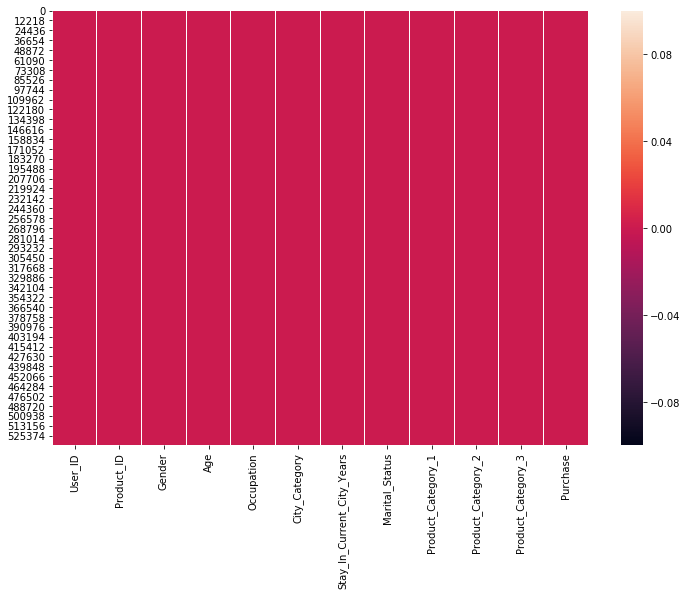

In [54]:
# Let's see if there are any missing values remaining.

plt.figure(figsize=(12,8))

sns.heatmap(df.isnull())

# Train and Test Data models

In [55]:
# Now the dataset is ready!
# Let's build the model.

# Split the dataset

X = df.iloc[:,2:-1].values
y = df.iloc[:, -1].values

In [56]:
# print X: Train data
X

array([['F', '0-17', 10, ..., 3, 8.0, 15.5],
       ['F', '0-17', 10, ..., 1, 6.0, 14.0],
       ['F', '0-17', 10, ..., 12, 8.0, 15.5],
       ...,
       ['M', '36-45', 16, ..., 8, 15.0, 15.5],
       ['M', '36-45', 16, ..., 5, 9.0, 15.5],
       ['M', '36-45', 16, ..., 5, 8.0, 15.5]], dtype=object)

In [57]:
y # test Data

array([ 8370, 15200,  1422, ...,  8043,  7172,  6875], dtype=int64)

In [58]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]

In [59]:
X

array([[ 0. ,  0. ,  0. , ...,  3. ,  8. , 15.5],
       [ 0. ,  0. ,  0. , ...,  1. ,  6. , 14. ],
       [ 0. ,  0. ,  0. , ..., 12. ,  8. , 15.5],
       ...,
       [ 0. ,  0. ,  1. , ...,  8. , 15. , 15.5],
       [ 0. ,  0. ,  1. , ...,  5. ,  9. , 15.5],
       [ 0. ,  0. ,  1. , ...,  5. ,  8. , 15.5]])

In [60]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [61]:
# Feature Scaling

from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [62]:
# I will use some Regression models and figure out what will be the best, that is, the lowest "Mean Squared Error".

# Linear Regression

In [63]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [65]:
print(y_pred)

[10704.56571259  8388.49362711  9461.00603262 ...  7755.31120168
  9381.91351166  9389.14412   ]


In [66]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22002098.86844547

# Polynomial Regression

In [67]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

# I tried other "degree" values and figure out that the number "3" is the better.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Predicting the Test set results

y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [69]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

17555018.52342032

# Random Forest Regression

In [70]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
regressor.fit(X_train, y_train)

# I tried other "n_estimators" values and figure out that the number "600" is the better

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
y_pred = regressor.predict(X_test)

In [72]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9205905.262457434

In [73]:
# Comparing the "Mean Squared Error" between the three models, 
# we can realize that the "Random Forest Regression" is the better model for this problem.

In [74]:
# About the Black Friday dataset, we can see some conclusions below:

#1 - Men go to Black Friday more than women;
#2 - People who has 26-35 participate in Black Friday much more than others. 
# Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. 
# In summary we have three groups with the almost the same quantity of people between each element within the group.
# Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17;
#3 - We can't do much conclusions here, but is possible to realize that people with
# lows and highs occupation number go out to Black Friday more than who was mediums occupation number.
# Between lows and highs, low occupation number go out more than high occupation number;
#4 - People who lives in City B bought much more than others. 
# Followed by City C and A, with the almost the same number of people;
#5 - We can see that, in less amount of money, people who lives in City A and C spent almost the same;
#6 - People who are married attend the event more than who aren't; &
#7 - People who has less time in the same city go to Black Friday more than has more time.
# The exception is who has less than 1 (one) year.

# Observation: 

# We can realize that, regardless the parameters, the graphs has almost the same shape.
# It's a very curious observation. Everyone has almost the same behavior according to money spend.